# Model

The puspose of this notebook is to create a model and all the features that can help to improve the accuracy of such model.

It is been decided to use a Random Forest due to the good results it gives

We will follow the following points:

1. Create the dataframe
2. Times feature engineering
3. Lag Variables
4. Weather feature engineering
5. The function for all the feature engineering
6. Model
    1. First Model
    2. RandomizedSearchCV Model
    3. Test
7. Visualization

*NOTE: Kindly note that this notebook has been "cleaned up" and all the code has been organized for your easy understanding.*

## 1. Create the dataframe

In [7]:
#Import libraries
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_columns', None)
from datetime import datetime

In [8]:
#Get the preprocessig_v2.py data path
cwd = os.getcwd()
cwd_list = cwd.split(os.sep)
preprocessing_path = os.path.join(os.sep.join(cwd_list[:-1]), '02-EDA')
preprocessing_path

'C:\\Users\\Aeroengy\\Desktop\\TFM\\02-EDA'

In [9]:
%cd $preprocessing_path
import preprocessing_v2 as pre
%cd $cwd

C:\Users\Aeroengy\Desktop\TFM\02-EDA
C:\Users\Aeroengy\Desktop\TFM\03-MODEL


In [10]:
#Define data path WINDOWS
data_path = os.path.join(os.sep.join(cwd_list[:-1]), 'DATA')
data_path

'C:\\Users\\Aeroengy\\Desktop\\TFM\\DATA'

In [5]:
#Define data path LINUX
# data_path = '/home/gonzalo/Data/TFM/DATA/'
# data_path

In [6]:
df_dock_bikes = pre.make_all_dataset(data_path, 'dock_bikes',by_postal_code=True, verbose=True )

0%[--10%------------------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Estacions_201809.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201811.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Stations_201812.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201901.json added to DataSet


In [7]:
df_total_bases = pre.total_bases_dataset(data_path)

In [8]:
df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)

In [9]:
df_total_bases.describe()

,28013_total_bases,28015_total_bases,28004_total_bases,28010_total_bases,28005_total_bases,28008_total_bases,28014_total_bases,28012_total_bases,28009_total_bases,28007_total_bases,28001_total_bases,28006_total_bases,28020_total_bases,28002_total_bases,28045_total_bases,28003_total_bases,28046_total_bases,28036_total_bases,28016_total_bases
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,215.472863,127.050204,335.457033,114.683853,242.411126,186.023066,179.636590,261.184080,333.454093,92.608096,201.455902,184.428087,158.227725,109.790366,116.201945,134.442108,81.158526,70.592040,23.499774
std,40.228308,5.691990,9.059647,4.771789,12.986139,4.272012,6.647029,12.303283,5.656858,2.471179,7.964166,6.042274,5.380389,3.355734,2.597158,4.500237,8.149972,2.757976,0.733331
min,87.000000,97.000000,301.000000,86.000000,197.000000,143.000000,138.000000,210.000000,299.000000,70.000000,144.000000,152.000000,111.000000,63.000000,89.000000,108.000000,0.000000,46.000000,20.000000
25%,221.000000,125.000000,329.000000,113.000000,235.000000,184.000000,177.000000,254.000000,331.000000,91.000000,201.000000,183.000000,157.000000,109.000000,115.000000,133.000000,81.000000,70.000000,23.000000
50%,235.000000,128.000000,337.000000,116.000000,246.000000,187.000000,181.000000,263.000000,334.000000,93.000000,203.000000,186.000000,159.000000,110.000000,117.000000,135.000000,82.000000,71.000000,24.000000
75%,238.000000,131.000000,343.000000,117.000000,252.000000,189.000000,184.000000,270.000000,337.000000,94.000000,205.000000,188.000000,161.000000,112.000000,118.000000,137.000000,83.000000,72.000000,24.000000
max,245.000000,135.000000,356.000000,120.000000,261.000000,194.000000,189.000000,297.000000,344.000000,96.000000,210.000000,192.000000,165.000000,114.000000,120.000000,140.000000,84.000000,72.000000,24.000000


In [10]:
df_occupation_rate.head()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate
Date,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307
2018-08-04,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611
2018-08-05,0.352376,0.460019,0.368582,0.520932,0.378999,0.521230,0.407549,0.415905,0.442334,0.512357,0.470336,0.532366,0.468555,0.500566,0.485523,0.548259,0.509181,0.499412,0.452080


In [11]:
df_occupation_rate.shape

(185, 19)

#### Let's divide the dataset into train, validaton an the other one for test.

In [12]:
train = df_occupation_rate.iloc[:-2]
train.tail(1)

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate
Date,,,,,,,,,,,,,,,,,,,
2019-01-30,0.48614,0.512156,0.556675,0.407846,0.564081,0.463787,0.35214,0.420886,0.532424,0.526549,0.385246,0.402423,0.458475,0.437238,0.438652,0.613636,0.431234,0.553488,0.576655


In [13]:
validation = df_occupation_rate[-2:-1]
validation

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate
Date,,,,,,,,,,,,,,,,,,,
2019-01-31,0.53734,0.454545,0.506321,0.418848,0.471588,0.431507,0.356584,0.48739,0.547666,0.411472,0.436453,0.521556,0.487042,0.429854,0.450518,0.554733,0.537722,0.610229,0.521336


In [14]:
test = df_occupation_rate[-1:]
test

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate
Date,,,,,,,,,,,,,,,,,,,
2019-02-01,0.487179,0.576,0.473837,0.369369,0.602362,0.407609,0.325843,0.689781,0.561765,0.677778,0.131068,0.438503,0.525974,0.306306,0.422414,0.597015,0.578313,0.614286,0.714286


#### Kindly note that the split is just informative, we will split the dataset before train the model. In the following engineering we will use the train with validations because it is needed the day to predict to get some features

## 2. Times feature engineering

The procedure we are going to follow is the following:

- Make the feature day_month, since it may be important to know if we are at the beginning or end of the month.
- Make the feature back_days, which will be the number of days between the day to predict and the sample.
- Maje the feature weekday which will be divided in two, since in order to keep the information that the sunday is next to monday, we will divide by coordinates where the days of the week will be aroun a circle as a clock.

In [15]:
train = df_occupation_rate.iloc[:-1]
train.head()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate
Date,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307
2018-08-04,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611
2018-08-05,0.352376,0.460019,0.368582,0.520932,0.378999,0.521230,0.407549,0.415905,0.442334,0.512357,0.470336,0.532366,0.468555,0.500566,0.485523,0.548259,0.509181,0.499412,0.452080


In [16]:
 train.index[2].day

3

In [17]:
train['day_month'] = train.index.day
train.head()

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month
Date,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3
2018-08-04,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611,4
2018-08-05,0.352376,0.460019,0.368582,0.520932,0.378999,0.521230,0.407549,0.415905,0.442334,0.512357,0.470336,0.532366,0.468555,0.500566,0.485523,0.548259,0.509181,0.499412,0.452080,5


In [18]:
train.index[-1]

Timestamp('2019-01-31 00:00:00', freq='D')

In [19]:
date_to_predict =  train.index[-1]

In [20]:
diff_dates = date_to_predict - train.index

In [21]:
train['back_days'] = diff_dates.days
train.tail(5)

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-27,0.299477,0.385396,0.162701,0.203048,0.494028,0.653363,0.407425,0.550138,0.632122,0.667118,0.347915,0.643278,0.526451,0.603318,0.660714,0.490738,0.710355,0.537703,0.715044,27,4
2019-01-28,0.368841,0.332530,0.215184,0.382485,0.444240,0.560981,0.454824,0.507675,0.597810,0.568873,0.498269,0.551532,0.519191,0.628977,0.582752,0.668240,0.658488,0.633393,0.870567,28,3
2019-01-29,0.448655,0.436226,0.428039,0.453835,0.521565,0.520196,0.451750,0.458112,0.482685,0.652618,0.372763,0.426589,0.468322,0.489508,0.538020,0.620786,0.532898,0.645218,0.799283,29,2
2019-01-30,0.486140,0.512156,0.556675,0.407846,0.564081,0.463787,0.352140,0.420886,0.532424,0.526549,0.385246,0.402423,0.458475,0.437238,0.438652,0.613636,0.431234,0.553488,0.576655,30,1
2019-01-31,0.537340,0.454545,0.506321,0.418848,0.471588,0.431507,0.356584,0.487390,0.547666,0.411472,0.436453,0.521556,0.487042,0.429854,0.450518,0.554733,0.537722,0.610229,0.521336,31,0


In [22]:
train.index[2].weekday()

4

In [23]:
days_of_week = 7

train['sin_weekday'] = np.sin(2*np.pi*train.index.weekday/days_of_week)
train['cos_weekday'] = np.cos(2*np.pi*train.index.weekday/days_of_week)

train.head(14)

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday
Date,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1,183,0.974928,-0.222521
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2,182,0.433884,-0.900969
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3,181,-0.433884,-0.900969
2018-08-04,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611,4,180,-0.974928,-0.222521
2018-08-05,0.352376,0.460019,0.368582,0.520932,0.378999,0.521230,0.407549,0.415905,0.442334,0.512357,0.470336,0.532366,0.468555,0.500566,0.485523,0.548259,0.509181,0.499412,0.452080,5,179,-0.781831,0.623490
2018-08-06,0.511089,0.479091,0.371330,0.407967,0.399603,0.452786,0.417554,0.438234,0.439910,0.432203,0.498646,0.460795,0.422601,0.496408,0.465886,0.460161,0.515429,0.515355,0.447684,6,178,0.000000,1.000000
2018-08-07,0.508705,0.458741,0.395698,0.385221,0.445691,0.535492,0.421878,0.490142,0.452694,0.478778,0.427686,0.459800,0.365116,0.439323,0.485547,0.471471,0.509718,0.483492,0.240964,7,177,0.781831,0.623490
2018-08-08,0.409048,0.463698,0.414617,0.412958,0.547779,0.511915,0.397177,0.625920,0.456338,0.458944,0.379381,0.438522,0.422281,0.387617,0.500182,0.481905,0.411286,0.465956,0.385714,8,176,0.974928,-0.222521
2018-08-09,0.523793,0.381074,0.373979,0.447518,0.595662,0.480821,0.406510,0.467355,0.487999,0.552320,0.406807,0.412836,0.448106,0.396284,0.460503,0.466543,0.448503,0.561877,0.575652,9,175,0.433884,-0.900969


In [24]:
def make_time_features(df):
    date_to_predict =  df.index[-1]
    diff_dates = date_to_predict - df.index
    df['day_month'] = df.index.day
    df['back_days'] = diff_dates.days
    df['sin_weekday'] = np.sin(2*np.pi*df.index.weekday/7)
    df['cos_weekday'] = np.cos(2*np.pi*df.index.weekday/7)
    return df    

## 3. Lag Variables

In this case we will create a variable of how the occuppation rate was yesterday, 7 days before, and 30 days before.

In [25]:
def lag_function(df, column):
    df[column + '_' + 'lag' + '_' + '1'] = df[column].shift(1)
    df[column + '_' + 'lag' + '_' + '7'] = df[column].shift(7)
    df[column + '_' + 'lag' + '_' + '30'] = df[column].shift(30)
    return df

In [26]:
columns = [x for x in train if 'OccupationRate' in x]
columns

['28013_OccupationRate',
 '28015_OccupationRate',
 '28004_OccupationRate',
 '28010_OccupationRate',
 '28005_OccupationRate',
 '28008_OccupationRate',
 '28014_OccupationRate',
 '28012_OccupationRate',
 '28009_OccupationRate',
 '28007_OccupationRate',
 '28001_OccupationRate',
 '28006_OccupationRate',
 '28020_OccupationRate',
 '28002_OccupationRate',
 '28045_OccupationRate',
 '28003_OccupationRate',
 '28046_OccupationRate',
 '28036_OccupationRate',
 '28016_OccupationRate']

In [27]:
train.head()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday
Date,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1,183,0.974928,-0.222521
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2,182,0.433884,-0.900969
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3,181,-0.433884,-0.900969
2018-08-04,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611,4,180,-0.974928,-0.222521
2018-08-05,0.352376,0.460019,0.368582,0.520932,0.378999,0.521230,0.407549,0.415905,0.442334,0.512357,0.470336,0.532366,0.468555,0.500566,0.485523,0.548259,0.509181,0.499412,0.452080,5,179,-0.781831,0.623490


In [28]:
for column in columns:
    train = lag_function(train, column)

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [29]:
train.tail()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday,28013_OccupationRate_lag_1,28013_OccupationRate_lag_7,28013_OccupationRate_lag_30,28015_OccupationRate_lag_1,28015_OccupationRate_lag_7,28015_OccupationRate_lag_30,28004_OccupationRate_lag_1,28004_OccupationRate_lag_7,28004_OccupationRate_lag_30,28010_OccupationRate_lag_1,28010_OccupationRate_lag_7,28010_OccupationRate_lag_30,28005_OccupationRate_lag_1,28005_OccupationRate_lag_7,28005_OccupationRate_lag_30,28008_OccupationRate_lag_1,28008_OccupationRate_lag_7,28008_OccupationRate_lag_30,28014_OccupationRate_lag_1,28014_OccupationRate_lag_7,28014_OccupationRate_lag_30,28012_OccupationRate_lag_1,28012_OccupationRate_lag_7,28012_OccupationRate_lag_30,28009_OccupationRate_lag_1,28009_OccupationRate_lag_7,28009_OccupationRate_lag_30,28007_OccupationRate_lag_1,28007_OccupationRate_lag_7,28007_OccupationRate_lag_30,28001_OccupationRate_lag_1,28001_OccupationRate_lag_7,28001_OccupationRate_lag_30,28006_OccupationRate_lag_1,28006_OccupationRate_lag_7,28006_OccupationRate_lag_30,28020_OccupationRate_lag_1,28020_OccupationRate_lag_7,28020_OccupationRate_lag_30,28002_OccupationRate_lag_1,28002_OccupationRate_lag_7,28002_OccupationRate_lag_30,28045_OccupationRate_lag_1,28045_OccupationRate_lag_7,28045_OccupationRate_lag_30,28003_OccupationRate_lag_1,28003_OccupationRate_lag_7,28003_OccupationRate_lag_30,28046_OccupationRate_lag_1,28046_OccupationRate_lag_7,28046_OccupationRate_lag_30,28036_OccupationRate_lag_1,28036_OccupationRate_lag_7,28036_OccupationRate_lag_30,28016_OccupationRate_lag_1,28016_OccupationRate_lag_7,28016_OccupationRate_lag_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-27,0.299477,0.385396,0.162701,0.203048,0.494028,0.653363,0.407425,0.550138,0.632122,0.667118,0.347915,0.643278,0.526451,0.603318,0.660714,0.490738,0.710355,0.537703,0.715044,27,4,-0.781831,0.623490,0.340093,0.307210,0.600279,0.498247,0.420676,0.599477,0.302904,0.339709,0.476803,0.328088,0.425362,0.463109,0.584268,0.444961,0.528416,0.587575,0.551885,0.464310,0.461263,0.508024,0.497831,0.578990,0.685509,0.526642,0.550423,0.467378,0.461239,0.697448,0.494968,0.523615,0.332013,0.386173,0.400570,0.525242,0.487761,0.408267,0.440820,0.430865,0.412507,0.466641,0.457499,0.379203,0.622214,0.479264,0.503945,0.504513,0.530644,0.482832,0.514166,0.569969,0.426700,0.420828,0.421820,0.412255,0.633028,0.735652,0.575045
2019-01-28,0.368841,0.332530,0.215184,0.382485,0.444240,0.560981,0.454824,0.507675,0.597810,0.568873,0.498269,0.551532,0.519191,0.628977,0.582752,0.668240,0.658488,0.633393,0.870567,28,3,0.000000,1.000000,0.299477,0.378196,0.469131,0.385396,0.383934,0.647406,0.162701,0.295953,0.373213,0.203048,0.478980,0.495347,0.494028,0.476855,0.499397,0.653363,0.469613,0.471724,0.407425,0.426249,0.427057,0.550138,0.533291,0.577803,0.632122,0.478776,0.498315,0.667118,0.430868,0.417687,0.347915,0.511077,0.493282,0.643278,0.490783,0.506307,0.526451,0.474248,0.432461,0.603318,0.466239,0.450076,0.660714,0.593569,0.496686,0.490738,0.473800,0.538744,0.710355,0.624053,0.471218,0.537703,0.585181,0.488663,0.715044,0.510563,0.395797
2019-01-29,0.448655,0.436226,0.428039,0.453835,0.521565,0.520196,0.451750,0.458112,0.482685,0.652618,0.372763,0.426589,0.468322,0.489508,0.538020,0.620786,0.532898,0.645218,0.799283,29,2,0.781831,0.623490,0.368841,0.374714,0.509503,0.332530,0.420573,0.538589,0.215184,0.459331,0.341918,0.382485,0.405787,0.418613,0.444240,0.526350,0.540862,0.560981,0.461794,0.446960,0.454824,0.439801,0.443197,0.507675,0.483143,0.612435,0.597810,0.486050,0.521352,0.568873,0.646168,0.489750,0

In [30]:
train.fillna(0, inplace=True)
train.head(31)

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday,28013_OccupationRate_lag_1,28013_OccupationRate_lag_7,28013_OccupationRate_lag_30,28015_OccupationRate_lag_1,28015_OccupationRate_lag_7,28015_OccupationRate_lag_30,28004_OccupationRate_lag_1,28004_OccupationRate_lag_7,28004_OccupationRate_lag_30,28010_OccupationRate_lag_1,28010_OccupationRate_lag_7,28010_OccupationRate_lag_30,28005_OccupationRate_lag_1,28005_OccupationRate_lag_7,28005_OccupationRate_lag_30,28008_OccupationRate_lag_1,28008_OccupationRate_lag_7,28008_OccupationRate_lag_30,28014_OccupationRate_lag_1,28014_OccupationRate_lag_7,28014_OccupationRate_lag_30,28012_OccupationRate_lag_1,28012_OccupationRate_lag_7,28012_OccupationRate_lag_30,28009_OccupationRate_lag_1,28009_OccupationRate_lag_7,28009_OccupationRate_lag_30,28007_OccupationRate_lag_1,28007_OccupationRate_lag_7,28007_OccupationRate_lag_30,28001_OccupationRate_lag_1,28001_OccupationRate_lag_7,28001_OccupationRate_lag_30,28006_OccupationRate_lag_1,28006_OccupationRate_lag_7,28006_OccupationRate_lag_30,28020_OccupationRate_lag_1,28020_OccupationRate_lag_7,28020_OccupationRate_lag_30,28002_OccupationRate_lag_1,28002_OccupationRate_lag_7,28002_OccupationRate_lag_30,28045_OccupationRate_lag_1,28045_OccupationRate_lag_7,28045_OccupationRate_lag_30,28003_OccupationRate_lag_1,28003_OccupationRate_lag_7,28003_OccupationRate_lag_30,28046_OccupationRate_lag_1,28046_OccupationRate_lag_7,28046_OccupationRate_lag_30,28036_OccupationRate_lag_1,28036_OccupationRate_lag_7,28036_OccupationRate_lag_30,28016_OccupationRate_lag_1,28016_OccupationRate_lag_7,28016_OccupationRate_lag_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1,183,0.974928,-0.222521,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2,182,0.433884,-0.900969,0.222725,0.000000,0.000000,0.357760,0.000000,0.00000,0.223711,0.000000,0.000000,0.526093,0.000000,0.000000,0.508977,0.000000,0.000000,0.382280,0.000000,0.00000,0.376431,0.000000,0.000000,0.525494,0.000000,0.000000,0.459238,0.000000,0.000000,0.637176,0.000000,0.000000,0.374077,0.000000,0.000000,0.416704,0.000000,0.000000,0.558309,0.000000,0.000000,0.560564,0.000000,0.000000,0.497305,0.000000,0.000000,0.528046,0.000000,0.000000,0.392157,0.000000,0.000000,0.588095,0.000000,0.000000,0.256932,0.000000,0.000000
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3,181,-0.433884,-0.900969,0.269197,0.000000,0.000000,0.309609,0.000000,0.00000,0.287564,0.000000,0.000000,0.429735,0.000000,0.000000,0.494181,0.000000,0.000000,0.415399,0.000000,0.00000,0.429609,0.000000,0.000000,0.525772,0.000000,0.000000,0.472398,0.000000,0.000000,0.586897,0.000000,0.000000,0

In [31]:
def bucle_lag_function(df):
    columns = [x for x in df if 'OccupationRate' in x]
    for column in columns:
        df = lag_function(df, column)
    df.fillna(0, inplace=True)
    return df

## 4. Weather feature engineering

In [32]:
df_weather = pd.read_json(os.path.join(data_path, 'METEO.txt'))
df_weather.head()

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,tmax,tmed,tmin,velmedia
0,667,22.0,2018-07-29,24,05,11:30,14:10,16:30,3195,"MADRID, RETIRO","0,0","939,9","936,9",MADRID,"7,5","32,6","26,2","19,8","1,7"
1,667,28.0,2018-07-30,09,18,15:00,14:40,05:30,3195,"MADRID, RETIRO","0,0","941,2","938,7",MADRID,"6,9","34,1","26,8","19,4","1,4"
2,667,16.0,2018-07-31,08,18,15:00,14:10,04:50,3195,"MADRID, RETIRO","0,0","941,8","938,7",MADRID,"6,4","35,3","28,2","21,1","1,1"
3,667,4.0,2018-08-01,10,18,00:40,13:50,05:45,3195,"MADRID, RETIRO","0,0","941,1","938,8",MADRID,"6,4","37,0","30,2","23,3","0,6"
4,667,7.0,2018-08-02,08,18,22:50,14:10,06:10,3195,"MADRID, RETIRO","0,0","943,8","939,7",MADRID,"7,5","38,5","31,6","24,6","1,1"


In [33]:
df_weather['fecha'] = pd.to_datetime(df_weather['fecha'], format='%Y-%m-%d')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 19 columns):
altitud        196 non-null int64
dir            194 non-null float64
fecha          196 non-null datetime64[ns]
horaPresMax    196 non-null object
horaPresMin    196 non-null object
horaracha      194 non-null object
horatmax       196 non-null object
horatmin       196 non-null object
indicativo     196 non-null int64
nombre         196 non-null object
prec           196 non-null object
presMax        196 non-null object
presMin        196 non-null object
provincia      196 non-null object
racha          194 non-null object
tmax           196 non-null object
tmed           196 non-null object
tmin           196 non-null object
velmedia       195 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(15)
memory usage: 29.2+ KB


In [34]:
selected_columns = ['fecha', 'prec', 'presMax', 'tmed', 'velmedia']

In [35]:
df_weather_selected = df_weather[selected_columns]
df_weather_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
fecha       196 non-null datetime64[ns]
prec        196 non-null object
presMax     196 non-null object
tmed        196 non-null object
velmedia    195 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 7.7+ KB


In [36]:
def convert_to_number(x):
    try:
        x = x.replace(',','.')
    except:
        x = 0
    try:
        x = float(x)
    except:
        x = 0
    return x

In [37]:
for column in [x for x in selected_columns if 'fecha' not in x]:
    print(column)
    df_weather_selected[column] = df_weather_selected[column].apply(convert_to_number)

prec
presMax
tmed
velmedia


C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df_weather_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
fecha       196 non-null datetime64[ns]
prec        196 non-null float64
presMax     196 non-null float64
tmed        196 non-null float64
velmedia    196 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.7 KB


In [39]:
train = train.merge(df_weather_selected[['fecha', 'prec', 'presMax', 'tmed', 'velmedia']], how='left', left_index=True, right_on='fecha')
train.drop('fecha', axis=1, inplace=True)
train.reset_index(drop=True, inplace=True)
train.head()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday,28013_OccupationRate_lag_1,28013_OccupationRate_lag_7,28013_OccupationRate_lag_30,28015_OccupationRate_lag_1,28015_OccupationRate_lag_7,28015_OccupationRate_lag_30,28004_OccupationRate_lag_1,28004_OccupationRate_lag_7,28004_OccupationRate_lag_30,28010_OccupationRate_lag_1,28010_OccupationRate_lag_7,28010_OccupationRate_lag_30,28005_OccupationRate_lag_1,28005_OccupationRate_lag_7,28005_OccupationRate_lag_30,28008_OccupationRate_lag_1,28008_OccupationRate_lag_7,28008_OccupationRate_lag_30,28014_OccupationRate_lag_1,28014_OccupationRate_lag_7,28014_OccupationRate_lag_30,28012_OccupationRate_lag_1,28012_OccupationRate_lag_7,28012_OccupationRate_lag_30,28009_OccupationRate_lag_1,28009_OccupationRate_lag_7,28009_OccupationRate_lag_30,28007_OccupationRate_lag_1,28007_OccupationRate_lag_7,28007_OccupationRate_lag_30,28001_OccupationRate_lag_1,28001_OccupationRate_lag_7,28001_OccupationRate_lag_30,28006_OccupationRate_lag_1,28006_OccupationRate_lag_7,28006_OccupationRate_lag_30,28020_OccupationRate_lag_1,28020_OccupationRate_lag_7,28020_OccupationRate_lag_30,28002_OccupationRate_lag_1,28002_OccupationRate_lag_7,28002_OccupationRate_lag_30,28045_OccupationRate_lag_1,28045_OccupationRate_lag_7,28045_OccupationRate_lag_30,28003_OccupationRate_lag_1,28003_OccupationRate_lag_7,28003_OccupationRate_lag_30,28046_OccupationRate_lag_1,28046_OccupationRate_lag_7,28046_OccupationRate_lag_30,28036_OccupationRate_lag_1,28036_OccupationRate_lag_7,28036_OccupationRate_lag_30,28016_OccupationRate_lag_1,28016_OccupationRate_lag_7,28016_OccupationRate_lag_30,prec,presMax,tmed,velmedia
0,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1,183,0.974928,-0.222521,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,941.1,30.2,0.6
1,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2,182,0.433884,-0.900969,0.222725,0.0,0.0,0.357760,0.0,0.0,0.223711,0.0,0.0,0.526093,0.0,0.0,0.508977,0.0,0.0,0.382280,0.0,0.0,0.376431,0.0,0.0,0.525494,0.0,0.0,0.459238,0.0,0.0,0.637176,0.0,0.0,0.374077,0.0,0.0,0.416704,0.0,0.0,0.558309,0.0,0.0,0.560564,0.0,0.0,0.497305,0.0,0.0,0.528046,0.0,0.0,0.392157,0.0,0.0,0.588095,0.0,0.0,0.256932,0.0,0.0,0.0,943.8,31.6,1.1
2,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3,181,-0.433884,-0.900969,0.269197,0.0,0.0,0.309609,0.0,0.0,0.287564,0.0,0.0,0.429735,0.0,0.0,0.494181,0.0,0.0,0.415399,0.0,0.0,0.429609,0.0,0.0,0.525772,0.0,0.0,0.472398,0.0,0.0,0.586897,0.0,0.0,0.403961,0.0,0.0,0.342030,0.0,0.0,0.498043,0.0,0.0,0.441732,0.0,0.0,0.486419,0.0,0.0,0.483920,0.0,0.0,0.494270,0.0,0.0,0.634788,0.0,0.0,0.292505,0.0,0.0,0.0,942.4,32.9,1.7
3,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611,4,180,-0.974928,-0.222521,0.312698,0.0,0.0,0.328358,0.0,0.0,0.246035,0.0,0.0,0.376402,0.0,0.0,0.470126,0.0,0.0,0.440479,0.0,0.0,0.544573,0.0,0.0,0.528967,0.0,0.0,0.407599,0.0,0.

In [40]:
train[['prec', 'presMax', 'tmed', 'velmedia']].fillna(train[['prec', 'presMax', 'tmed', 'velmedia']].mean(), inplace=True)
train[['prec', 'presMax', 'tmed', 'velmedia']]

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,prec,presMax,tmed,velmedia
0,0.0,941.1,30.2,0.6
1,0.0,943.8,31.6,1.1
2,0.0,942.4,32.9,1.7
3,0.0,943.3,31.0,0.0
4,0.0,942.1,31.0,0.8
5,0.0,941.0,30.6,1.7
6,0.0,937.7,30.7,2.8
7,0.0,937.2,27.9,2.8
8,0.0,943.0,25.4,2.2
9,0.0,945.8,24.4,2.2


In [41]:
train

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday,28013_OccupationRate_lag_1,28013_OccupationRate_lag_7,28013_OccupationRate_lag_30,28015_OccupationRate_lag_1,28015_OccupationRate_lag_7,28015_OccupationRate_lag_30,28004_OccupationRate_lag_1,28004_OccupationRate_lag_7,28004_OccupationRate_lag_30,28010_OccupationRate_lag_1,28010_OccupationRate_lag_7,28010_OccupationRate_lag_30,28005_OccupationRate_lag_1,28005_OccupationRate_lag_7,28005_OccupationRate_lag_30,28008_OccupationRate_lag_1,28008_OccupationRate_lag_7,28008_OccupationRate_lag_30,28014_OccupationRate_lag_1,28014_OccupationRate_lag_7,28014_OccupationRate_lag_30,28012_OccupationRate_lag_1,28012_OccupationRate_lag_7,28012_OccupationRate_lag_30,28009_OccupationRate_lag_1,28009_OccupationRate_lag_7,28009_OccupationRate_lag_30,28007_OccupationRate_lag_1,28007_OccupationRate_lag_7,28007_OccupationRate_lag_30,28001_OccupationRate_lag_1,28001_OccupationRate_lag_7,28001_OccupationRate_lag_30,28006_OccupationRate_lag_1,28006_OccupationRate_lag_7,28006_OccupationRate_lag_30,28020_OccupationRate_lag_1,28020_OccupationRate_lag_7,28020_OccupationRate_lag_30,28002_OccupationRate_lag_1,28002_OccupationRate_lag_7,28002_OccupationRate_lag_30,28045_OccupationRate_lag_1,28045_OccupationRate_lag_7,28045_OccupationRate_lag_30,28003_OccupationRate_lag_1,28003_OccupationRate_lag_7,28003_OccupationRate_lag_30,28046_OccupationRate_lag_1,28046_OccupationRate_lag_7,28046_OccupationRate_lag_30,28036_OccupationRate_lag_1,28036_OccupationRate_lag_7,28036_OccupationRate_lag_30,28016_OccupationRate_lag_1,28016_OccupationRate_lag_7,28016_OccupationRate_lag_30,prec,presMax,tmed,velmedia
0,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1,183,0.974928,-0.222521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,941.1,30.2,0.6
1,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2,182,0.433884,-0.900969,0.222725,0.000000,0.000000,0.357760,0.000000,0.000000,0.223711,0.000000,0.000000,0.526093,0.000000,0.000000,0.508977,0.000000,0.000000,0.382280,0.000000,0.000000,0.376431,0.000000,0.000000,0.525494,0.000000,0.000000,0.459238,0.000000,0.000000,0.637176,0.000000,0.000000,0.374077,0.000000,0.000000,0.416704,0.000000,0.000000,0.558309,0.000000,0.000000,0.560564,0.000000,0.000000,0.497305,0.000000,0.000000,0.528046,0.000000,0.000000,0.392157,0.000000,0.000000,0.588095,0.000000,0.000000,0.256932,0.000000,0.000000,0.0,943.8,31.6,1.1
2,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3,181,-0.433884,-0.900969,0.269197,0.000000,0.000000,0.309609,0.000000,0.000000,0.287564,0.000000,0.000000,0.429735,0.000000,0.000000,0.494181,0.000000,0.000000,0.415399,0.000000,0.000000,0.429609,0.000000,0.000000,0.525772,0.000000,0.000000,0.472398,0.000000,0.000000,0.586897,0.000000,0.000000,0.403961,0.000000,0.000000,0.342030,0.0000

In [42]:
def make_weather_features(df, df_weather):
    df_weather['fecha'] = pd.to_datetime(df_weather['fecha'], format='%Y-%m-%d')
    selected_columns = ['fecha', 'prec', 'presMax', 'tmed', 'velmedia']
    df_weather_selected = df_weather[selected_columns]
    for column in [x for x in selected_columns if 'fecha' not in x]:
        df_weather_selected[column] = df_weather_selected[column].apply(convert_to_number)
    df = df.merge(df_weather_selected[['fecha', 'prec', 'presMax', 'tmed', 'velmedia']], how='left', left_index=True, right_on='fecha')
    df.drop('fecha', axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df[['prec', 'presMax', 'tmed', 'velmedia']].fillna(df[['prec', 'presMax', 'tmed', 'velmedia']].mean(), inplace=True)
    return df

## 5. The function for all the feature engineering

In [43]:
def feature_engineering(df, df_weather):
    df = make_time_features(df)
    df = bucle_lag_function(df)
    df = make_weather_features(df, df_weather)
    return df

In [44]:
df_dock_bikes = pre.make_all_dataset(data_path, 'dock_bikes',by_postal_code=True, verbose=False )
df_total_bases = pre.total_bases_dataset(data_path)
df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)
df_test_fun_feature_engineering = df_occupation_rate[:-1]
df_test_fun_feature_engineering.head()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate
Date,,,,,,,,,,,,,,,,,,,
2018-08-01,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932
2018-08-02,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505
2018-08-03,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307
2018-08-04,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611
2018-08-05,0.352376,0.460019,0.368582,0.520932,0.378999,0.521230,0.407549,0.415905,0.442334,0.512357,0.470336,0.532366,0.468555,0.500566,0.485523,0.548259,0.509181,0.499412,0.452080


In [45]:
df_weather_test_fun_feature_engineering = pd.read_json(os.path.join(data_path, 'METEO.txt'))
df_weather_test_fun_feature_engineering.head(1)

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,tmax,tmed,tmin,velmedia
0,667,22.0,2018-07-29,24,05,11:30,14:10,16:30,3195,"MADRID, RETIRO","0,0","939,9","936,9",MADRID,"7,5","32,6","26,2","19,8","1,7"


In [46]:
train_test_fun_feature_engineering = feature_engineering(df_test_fun_feature_engineering, df_weather_test_fun_feature_engineering)

C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [47]:
train_test_fun_feature_engineering.head()

,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday,28013_OccupationRate_lag_1,28013_OccupationRate_lag_7,28013_OccupationRate_lag_30,28015_OccupationRate_lag_1,28015_OccupationRate_lag_7,28015_OccupationRate_lag_30,28004_OccupationRate_lag_1,28004_OccupationRate_lag_7,28004_OccupationRate_lag_30,28010_OccupationRate_lag_1,28010_OccupationRate_lag_7,28010_OccupationRate_lag_30,28005_OccupationRate_lag_1,28005_OccupationRate_lag_7,28005_OccupationRate_lag_30,28008_OccupationRate_lag_1,28008_OccupationRate_lag_7,28008_OccupationRate_lag_30,28014_OccupationRate_lag_1,28014_OccupationRate_lag_7,28014_OccupationRate_lag_30,28012_OccupationRate_lag_1,28012_OccupationRate_lag_7,28012_OccupationRate_lag_30,28009_OccupationRate_lag_1,28009_OccupationRate_lag_7,28009_OccupationRate_lag_30,28007_OccupationRate_lag_1,28007_OccupationRate_lag_7,28007_OccupationRate_lag_30,28001_OccupationRate_lag_1,28001_OccupationRate_lag_7,28001_OccupationRate_lag_30,28006_OccupationRate_lag_1,28006_OccupationRate_lag_7,28006_OccupationRate_lag_30,28020_OccupationRate_lag_1,28020_OccupationRate_lag_7,28020_OccupationRate_lag_30,28002_OccupationRate_lag_1,28002_OccupationRate_lag_7,28002_OccupationRate_lag_30,28045_OccupationRate_lag_1,28045_OccupationRate_lag_7,28045_OccupationRate_lag_30,28003_OccupationRate_lag_1,28003_OccupationRate_lag_7,28003_OccupationRate_lag_30,28046_OccupationRate_lag_1,28046_OccupationRate_lag_7,28046_OccupationRate_lag_30,28036_OccupationRate_lag_1,28036_OccupationRate_lag_7,28036_OccupationRate_lag_30,28016_OccupationRate_lag_1,28016_OccupationRate_lag_7,28016_OccupationRate_lag_30,prec,presMax,tmed,velmedia
0,0.222725,0.357760,0.223711,0.526093,0.508977,0.382280,0.376431,0.525494,0.459238,0.637176,0.374077,0.416704,0.558309,0.560564,0.497305,0.528046,0.392157,0.588095,0.256932,1,183,0.974928,-0.222521,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,941.1,30.2,0.6
1,0.269197,0.309609,0.287564,0.429735,0.494181,0.415399,0.429609,0.525772,0.472398,0.586897,0.403961,0.342030,0.498043,0.441732,0.486419,0.483920,0.494270,0.634788,0.292505,2,182,0.433884,-0.900969,0.222725,0.0,0.0,0.357760,0.0,0.0,0.223711,0.0,0.0,0.526093,0.0,0.0,0.508977,0.0,0.0,0.382280,0.0,0.0,0.376431,0.0,0.0,0.525494,0.0,0.0,0.459238,0.0,0.0,0.637176,0.0,0.0,0.374077,0.0,0.0,0.416704,0.0,0.0,0.558309,0.0,0.0,0.560564,0.0,0.0,0.497305,0.0,0.0,0.528046,0.0,0.0,0.392157,0.0,0.0,0.588095,0.0,0.0,0.256932,0.0,0.0,0.0,943.8,31.6,1.1
2,0.312698,0.328358,0.246035,0.376402,0.470126,0.440479,0.544573,0.528967,0.407599,0.594210,0.426108,0.401211,0.472252,0.569466,0.577809,0.409132,0.453639,0.669497,0.453307,3,181,-0.433884,-0.900969,0.269197,0.0,0.0,0.309609,0.0,0.0,0.287564,0.0,0.0,0.429735,0.0,0.0,0.494181,0.0,0.0,0.415399,0.0,0.0,0.429609,0.0,0.0,0.525772,0.0,0.0,0.472398,0.0,0.0,0.586897,0.0,0.0,0.403961,0.0,0.0,0.342030,0.0,0.0,0.498043,0.0,0.0,0.441732,0.0,0.0,0.486419,0.0,0.0,0.483920,0.0,0.0,0.494270,0.0,0.0,0.634788,0.0,0.0,0.292505,0.0,0.0,0.0,942.4,32.9,1.7
3,0.365708,0.366367,0.181165,0.393908,0.389521,0.472140,0.501181,0.456476,0.515255,0.554839,0.512104,0.445342,0.493756,0.476997,0.544531,0.520857,0.519066,0.555746,0.491611,4,180,-0.974928,-0.222521,0.312698,0.0,0.0,0.328358,0.0,0.0,0.246035,0.0,0.0,0.376402,0.0,0.0,0.470126,0.0,0.0,0.440479,0.0,0.0,0.544573,0.0,0.0,0.528967,0.0,0.0,0.407599,0.0,0.

In [48]:
np.sum(train_test_fun_feature_engineering.values - train.values)

0.0

## 6. Model

### A. First Model

In [49]:
columns = train.columns
X_columns = [x for x in columns if '28' in x and 'lag' in x]
X_columns = X_columns + ['prec', 'presMax', 'tmed', 'velmedia', 'day_month', 'back_days', 'sin_weekday', 'cos_weekday']
X_columns

['28013_OccupationRate_lag_1',
 '28013_OccupationRate_lag_7',
 '28013_OccupationRate_lag_30',
 '28015_OccupationRate_lag_1',
 '28015_OccupationRate_lag_7',
 '28015_OccupationRate_lag_30',
 '28004_OccupationRate_lag_1',
 '28004_OccupationRate_lag_7',
 '28004_OccupationRate_lag_30',
 '28010_OccupationRate_lag_1',
 '28010_OccupationRate_lag_7',
 '28010_OccupationRate_lag_30',
 '28005_OccupationRate_lag_1',
 '28005_OccupationRate_lag_7',
 '28005_OccupationRate_lag_30',
 '28008_OccupationRate_lag_1',
 '28008_OccupationRate_lag_7',
 '28008_OccupationRate_lag_30',
 '28014_OccupationRate_lag_1',
 '28014_OccupationRate_lag_7',
 '28014_OccupationRate_lag_30',
 '28012_OccupationRate_lag_1',
 '28012_OccupationRate_lag_7',
 '28012_OccupationRate_lag_30',
 '28009_OccupationRate_lag_1',
 '28009_OccupationRate_lag_7',
 '28009_OccupationRate_lag_30',
 '28007_OccupationRate_lag_1',
 '28007_OccupationRate_lag_7',
 '28007_OccupationRate_lag_30',
 '28001_OccupationRate_lag_1',
 '28001_OccupationRate_lag_7'

In [50]:
y_columns = [y for y in columns if '28' in y and 'lag' not in y]
y_columns

['28013_OccupationRate',
 '28015_OccupationRate',
 '28004_OccupationRate',
 '28010_OccupationRate',
 '28005_OccupationRate',
 '28008_OccupationRate',
 '28014_OccupationRate',
 '28012_OccupationRate',
 '28009_OccupationRate',
 '28007_OccupationRate',
 '28001_OccupationRate',
 '28006_OccupationRate',
 '28020_OccupationRate',
 '28002_OccupationRate',
 '28045_OccupationRate',
 '28003_OccupationRate',
 '28046_OccupationRate',
 '28036_OccupationRate',
 '28016_OccupationRate']

In [51]:
X = train.iloc[:-1][X_columns]
y = train.iloc[:-1][y_columns]

In [52]:
print(X.shape)
print(y.shape)

(183, 65)
(183, 19)


In [53]:
def get_X_y(df):
    columns = df.columns
    X_columns = [x for x in columns if '28' in x and 'lag' in x]
    X_columns = X_columns + ['prec', 'presMax', 'tmed', 'velmedia', 'day_month', 'back_days', 'sin_weekday', 'cos_weekday']
    y_columns = [y for y in columns if '28' in y and 'lag' not in y]
    X = df[X_columns]
    y = df[y_columns]
    return (X, y)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model = RandomForestRegressor(max_depth=4, n_estimators=50, random_state=20)

In [56]:
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [57]:
X_validation = train.iloc[-1:][X_columns]
y_real = train.iloc[-1:][y_columns]

In [58]:
print(X_validation.shape)
print(y_real.shape)

(1, 65)
(1, 19)


In [59]:
y_predicted_validation = model.predict(X_validation)
y_predicted_validation

array([[0.48410817, 0.50396695, 0.41894719, 0.45006248, 0.52778624,
        0.48235181, 0.42537803, 0.55672215, 0.48426719, 0.55580409,
        0.37294202, 0.41252537, 0.44997779, 0.4373378 , 0.52249467,
        0.51205203, 0.44831712, 0.49480516, 0.49649768]])

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
def metrics(y_real, y_predicted):
    mae = mean_absolute_error(y_real, y_predicted)
    print('MAE: %f' % mae)
    mse = mean_squared_error(y_real, y_predicted)
    print('MSE: %f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %f' % rmse)
    
    return mae, mse, rmse

In [62]:
metrics(y_real, y_predicted_validation)

MAE: 0.065029
MSE: 0.005279
RMSE: 0.072658


(0.06502930767230165, 0.005279217395703882, 0.07265822318020089)

### B. RandomizedSearchCV Model

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
GridedModel = GridSearchCV(RandomForestRegressor(),
                                    param_grid ={'n_estimators' : [10,30,50,80,100,130,150],
                                                        'max_depth' : [5,10,15,20,25,30,35,40]},
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1, verbose=2)

In [65]:
X_GridSearch, y_GridSearch = get_X_y(train)
print(X_GridSearch.shape, y_GridSearch.shape)

(184, 65) (184, 19)


In [66]:
GridedModel.fit(X_GridSearch, y_GridSearch)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   25.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50, 80, 100, 130, 150], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [67]:
GridedModel.best_params_

{'max_depth': 25, 'n_estimators': 30}

In [68]:
GridedModel.best_score_

-0.006210696989652005

In [69]:
model_hiper = GridedModel.best_estimator_

### C. Test

In [70]:
df_dock_bikes = pre.make_all_dataset(data_path, 'dock_bikes',by_postal_code=True, verbose=False )
df_total_bases = pre.total_bases_dataset(data_path)
df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)
df_weather = pd.read_json(os.path.join(data_path, 'METEO.txt'))
df_validation = feature_engineering(df_occupation_rate, df_weather)
print(df_validation.shape)
df_validation.tail(3)

(185, 84)


C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aeroengy\Anaconda3\envs\Prophet\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,28013_OccupationRate,28015_OccupationRate,28004_OccupationRate,28010_OccupationRate,28005_OccupationRate,28008_OccupationRate,28014_OccupationRate,28012_OccupationRate,28009_OccupationRate,28007_OccupationRate,28001_OccupationRate,28006_OccupationRate,28020_OccupationRate,28002_OccupationRate,28045_OccupationRate,28003_OccupationRate,28046_OccupationRate,28036_OccupationRate,28016_OccupationRate,day_month,back_days,sin_weekday,cos_weekday,28013_OccupationRate_lag_1,28013_OccupationRate_lag_7,28013_OccupationRate_lag_30,28015_OccupationRate_lag_1,28015_OccupationRate_lag_7,28015_OccupationRate_lag_30,28004_OccupationRate_lag_1,28004_OccupationRate_lag_7,28004_OccupationRate_lag_30,28010_OccupationRate_lag_1,28010_OccupationRate_lag_7,28010_OccupationRate_lag_30,28005_OccupationRate_lag_1,28005_OccupationRate_lag_7,28005_OccupationRate_lag_30,28008_OccupationRate_lag_1,28008_OccupationRate_lag_7,28008_OccupationRate_lag_30,28014_OccupationRate_lag_1,28014_OccupationRate_lag_7,28014_OccupationRate_lag_30,28012_OccupationRate_lag_1,28012_OccupationRate_lag_7,28012_OccupationRate_lag_30,28009_OccupationRate_lag_1,28009_OccupationRate_lag_7,28009_OccupationRate_lag_30,28007_OccupationRate_lag_1,28007_OccupationRate_lag_7,28007_OccupationRate_lag_30,28001_OccupationRate_lag_1,28001_OccupationRate_lag_7,28001_OccupationRate_lag_30,28006_OccupationRate_lag_1,28006_OccupationRate_lag_7,28006_OccupationRate_lag_30,28020_OccupationRate_lag_1,28020_OccupationRate_lag_7,28020_OccupationRate_lag_30,28002_OccupationRate_lag_1,28002_OccupationRate_lag_7,28002_OccupationRate_lag_30,28045_OccupationRate_lag_1,28045_OccupationRate_lag_7,28045_OccupationRate_lag_30,28003_OccupationRate_lag_1,28003_OccupationRate_lag_7,28003_OccupationRate_lag_30,28046_OccupationRate_lag_1,28046_OccupationRate_lag_7,28046_OccupationRate_lag_30,28036_OccupationRate_lag_1,28036_OccupationRate_lag_7,28036_OccupationRate_lag_30,28016_OccupationRate_lag_1,28016_OccupationRate_lag_7,28016_OccupationRate_lag_30,prec,presMax,tmed,velmedia
182,0.486140,0.512156,0.556675,0.407846,0.564081,0.463787,0.352140,0.420886,0.532424,0.526549,0.385246,0.402423,0.458475,0.437238,0.438652,0.613636,0.431234,0.553488,0.576655,30,2,0.974928,-0.222521,0.448655,0.441043,0.404470,0.436226,0.398558,0.534454,0.428039,0.503766,0.300455,0.453835,0.421431,0.392778,0.521565,0.494692,0.559349,0.520196,0.471920,0.486433,0.451750,0.405619,0.441580,0.458112,0.470756,0.631461,0.482685,0.503094,0.511408,0.652618,0.582307,0.431267,0.372763,0.427233,0.376222,0.426589,0.378536,0.473993,0.468322,0.456625,0.506075,0.489508,0.557110,0.600097,0.538020,0.432820,0.642418,0.620786,0.664815,0.552297,0.532898,0.518103,0.592685,0.645218,0.543261,0.572767,0.799283,0.655052,0.531083,4.1,936.1,7.2,3.3
183,0.537340,0.454545,0.506321,0.418848,0.471588,0.431507,0.356584,0.487390,0.547666,0.411472,0.436453,0.521556,0.487042,0.429854,0.450518,0.554733,0.537722,0.610229,0.521336,31,1,0.433884,-0.900969,0.486140,0.533935,0.316446,0.512156,0.512922,0.500167,0.556675,0.539579,0.240309,0.407846,0.428842,0.392897,0.564081,0.518771,0.549166,0.463787,0.471156,0.574824,0.352140,0.357969,0.418734,0.420886,0.489444,0.583303,0.532424,0.467587,0.495832,0.526549,0.582788,0.337838,0.385246,0.384745,0.374823,0.402423,0.357959,0.505721,0.458475,0.507808,0.496173,0.437238,0.551134,0.501500,0.438652,0.489849,0.516484,0.613636,0.518295,0.595069,0.431234,0.540838,0.562877,0.553488,0.573529,0.603796,0.576655,0.481973,0.790698,8.2,928.8,9.4,5.3
184,0.487179,0.576000,0.473837,0.369369,0.602362,0.407609,0.325843,0.689781,0.561765,0.677778,0.131068,0.438503,0.525974,0.306306,0.422414,0.597015,0.578313,0.614286,0.714286,1,0,-0.433884,-0.900969,0.537340,0.413932,0.328680,0.454545,0.495266,0.396491,0.506321,0.436804,0.364790,0.418848,0.449451,0.542868,0.471588,0.604405,0.504721,0.431507,0.429669,0.543123,0.356584,0.386472,0.443984,0.487390,0.594796,0.589769,0.547666,0.509342,0.509434,0.411472,0.638155,0.588341,0.436453,0.322437,0.424409,0.521556,0.4448

In [71]:
X_validation, y_val_real = get_X_y(df_validation.iloc[-1:])

In [72]:
print(X_validation.shape)
print(y_val_real.shape)

(1, 65)
(1, 19)


In [73]:
y_val_predicted = model_hiper.predict(X_validation)

In [74]:
metrics(y_val_real, y_val_predicted)

MAE: 0.105973
MSE: 0.015158
RMSE: 0.123119


(0.10597342389557647, 0.015158207581462605, 0.12311867275707046)

## 7. Visualization

In [11]:
import geopandas as gpd
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('opaque')
import json

#### Area Madrid City

In [29]:
#Estructura del diccionario GeoJSON
area_madrid = dict({'type': 'FeatureCollection',
    'features': []})


with open(os.path.join(data_path, 'areamadrid.txt')) as f:
    data = f.readlines()
    data = data[0]
    data = json.loads(data)
    dict_aux = {'type': 'Feature',
                'properties': {'NAME': 'Madrid'},
                'geometry': {'type': 'Polygon',
                           'coordinates': data['geometries'][0]['coordinates'][0]}}
    area_madrid['features'] = dict_aux
    f.close()

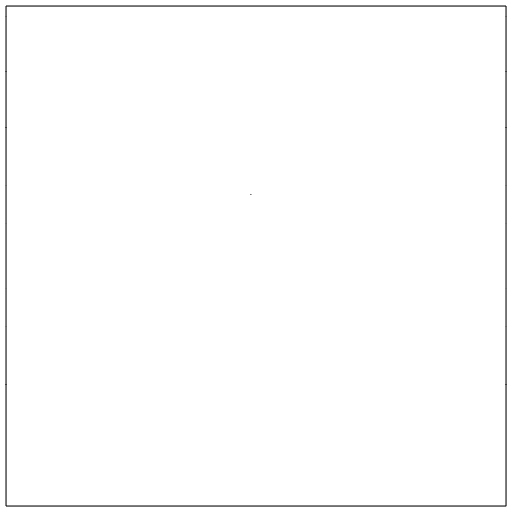

In [30]:
alt.Chart(alt.Data(values=data)).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=500,
        height=500
    )

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [23]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40.38, lon_0=-3.73,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

NameError: name 'Basemap' is not defined

<Figure size 576x576 with 0 Axes>